# CAR PRICE PREDICTION WITH MACHINE LEARNING :-

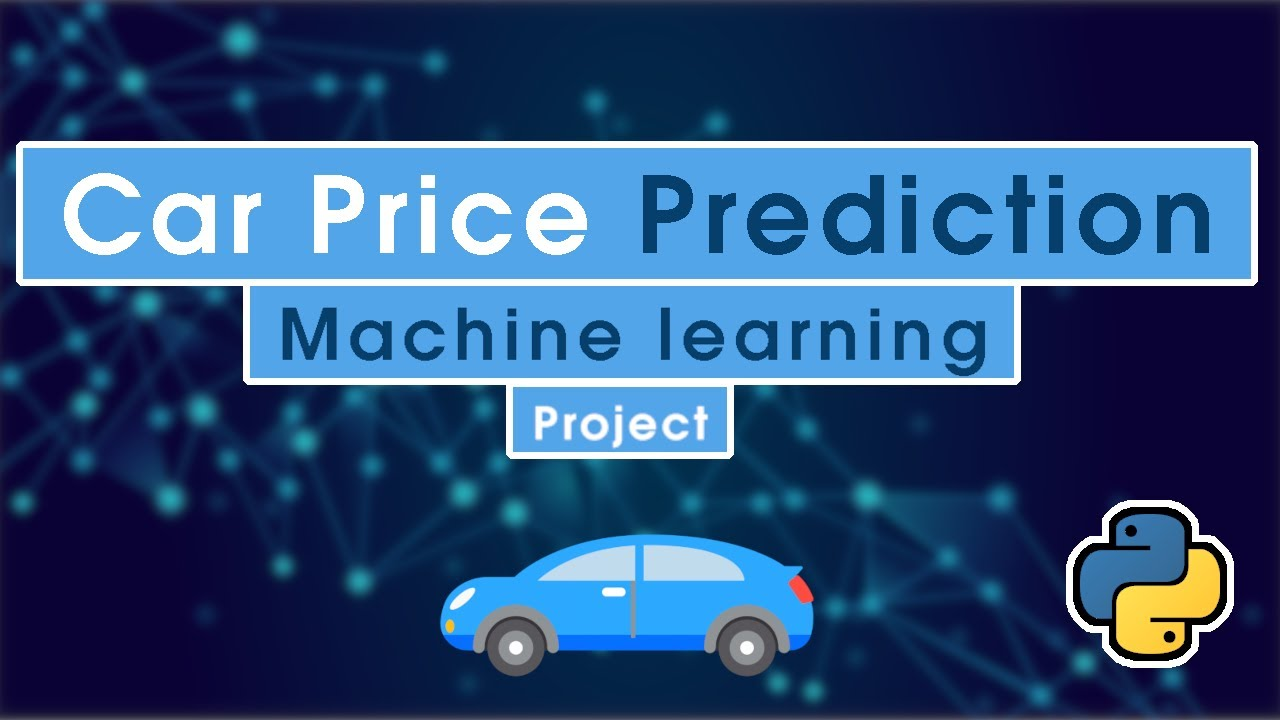

**1. First of all importing all the necessary libaries which I need for data analsis.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



**2. Loading the dataset 'car data.csv' in this jupyter notebook.**

In [2]:
car_data = pd.read_csv('car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
print('Shape of the dataset: ', car_data.shape)

Shape of the dataset:  (301, 9)


* The dataset contains 9 columns and 301 data rows.

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


The car_data is free of null data.

In [5]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_data.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [7]:
car_data.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [8]:
car_data.Selling_type.value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [9]:
car_data.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [10]:
car_data.duplicated().sum()

2

In [11]:
car_data.drop_duplicates(inplace =True)

In [12]:
colunas = car_data['Car_Name'].str.split(' ', n=1, expand=True)
car_data['Car_Name'] = colunas[0]

In [13]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
# copy the car_data into another variable
car_data_viz = car_data.copy()
car_data_viz.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
car_data_viz.iloc[:,0] = car_data_viz.iloc[:,0].str.capitalize()
car_data_viz

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,Ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,Sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,Ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,Wagon,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,Swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,City,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,Brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,City,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,City,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [16]:
car_data.replace({'Fuel_Type':{'Petrol': 0,'Diesel':1,'CNG':2}},inplace=True)
car_data.replace({'Selling_type':{'Dealer':0,'Individual':1}}, inplace = True)
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


* Petrol = 0, Diesel = 1, CNG = 2
* Dealer = 0, Individual = 1
* Manual = 0, Automatic = 1

In [17]:
car_data.drop('Car_Name', axis =1,inplace =True)

In [18]:
car_data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


In [19]:
car_data.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Year,1.000000,0.234369,-0.053167,-0.525714,0.046210,-0.036820,-0.003434,-0.181639
Selling_Price,0.234369,1.000000,0.876305,0.028566,0.500292,-0.553851,0.348869,-0.087880
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.431887,-0.511779,0.334326,0.009948
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.167287,-0.101030,0.163881,0.089367
Fuel_Type,0.046210,0.500292,0.431887,0.167287,1.000000,-0.347922,0.068618,-0.054174
Selling_type,-0.036820,-0.553851,-0.511779,-0.101030,-0.347922,1.000000,-0.058669,0.123646
Transmission,-0.003434,0.348869,0.334326,0.163881,0.068618,-0.058669,1.000000,0.052166
Owner,-0.181639,-0.087880,0.009948,0.089367,-0.054174,0.123646,0.052166,1.000000


<AxesSubplot:>

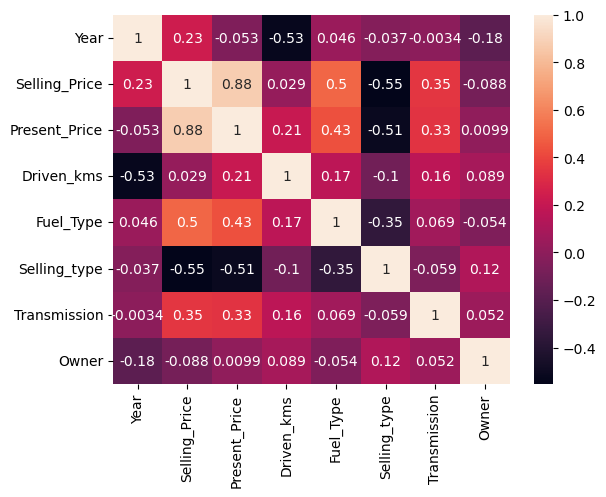

In [20]:
sns.heatmap(car_data.corr(),annot = True)

**2. Making Visualization**

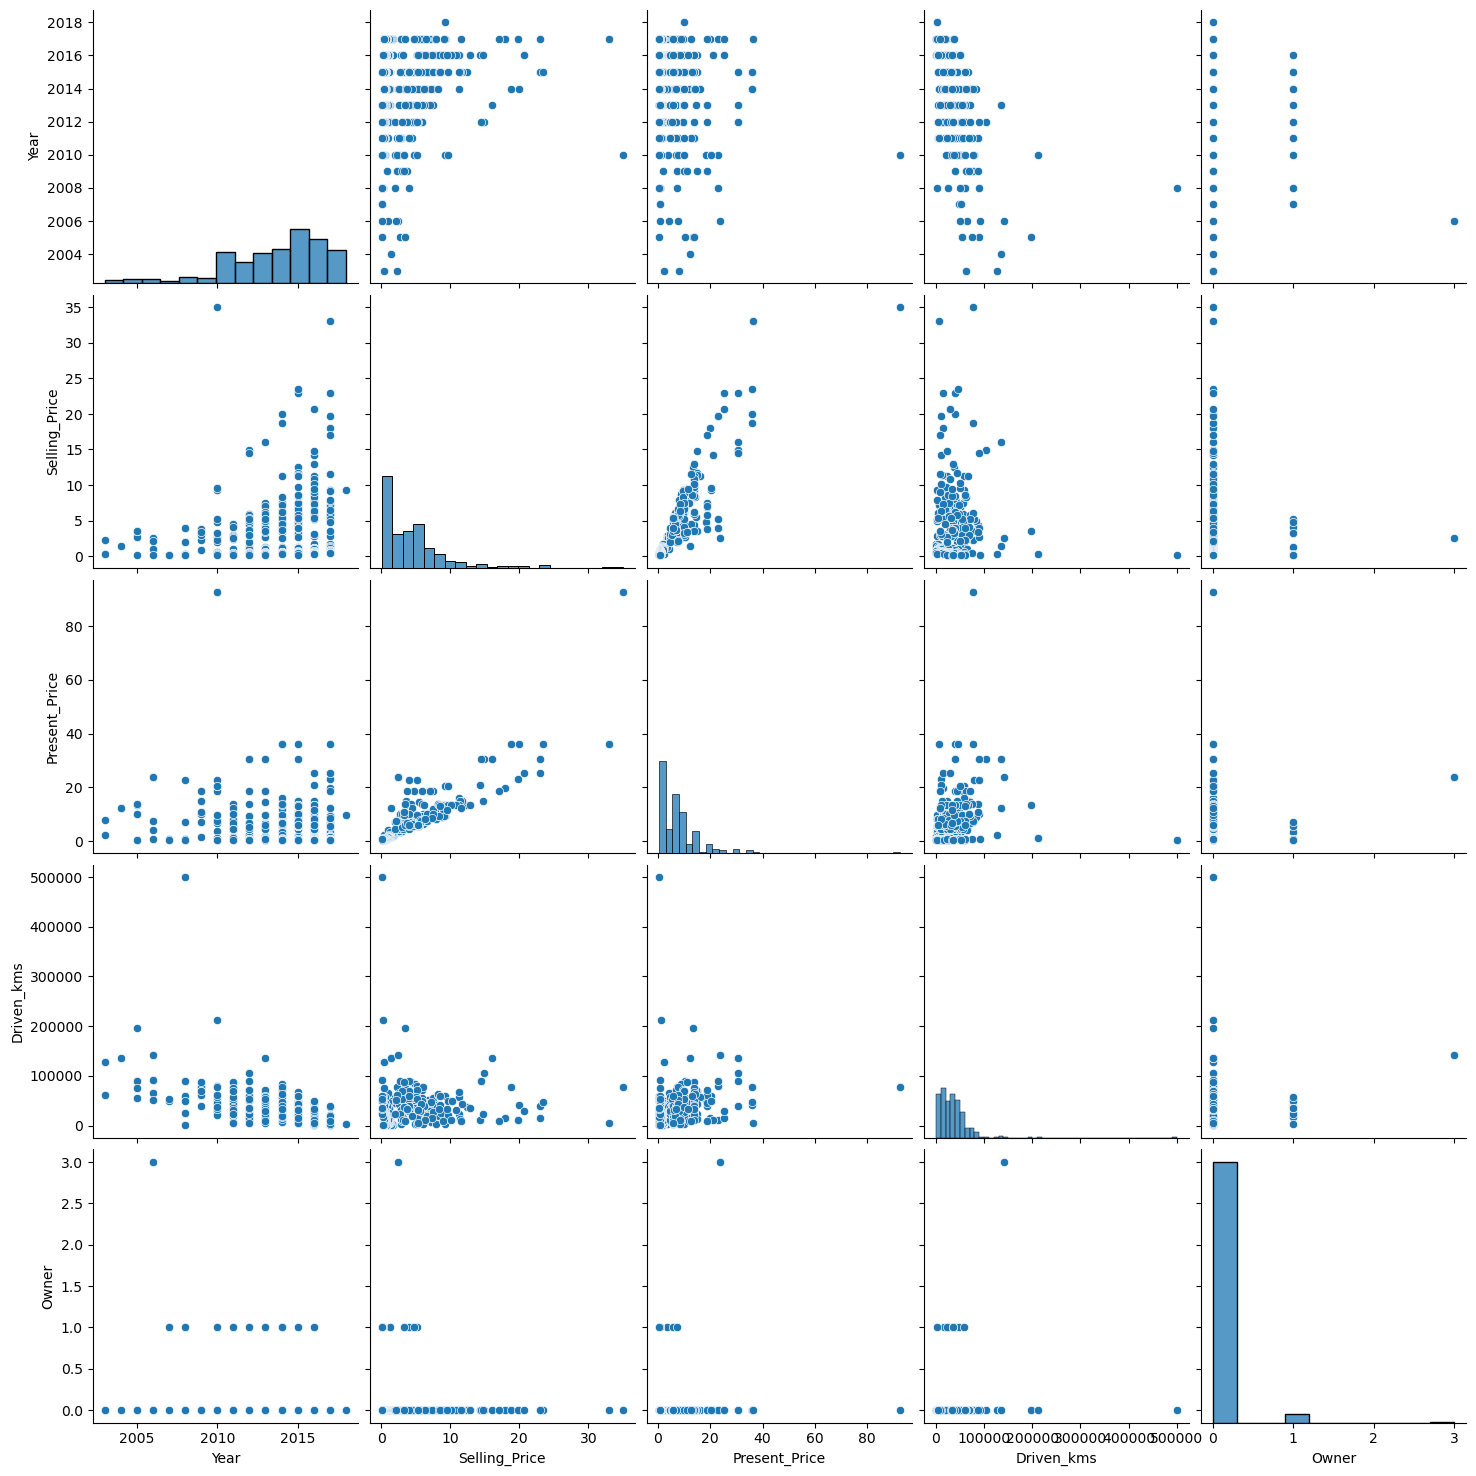

In [21]:
sns.pairplot(car_data_viz,height =3)
plt.show()

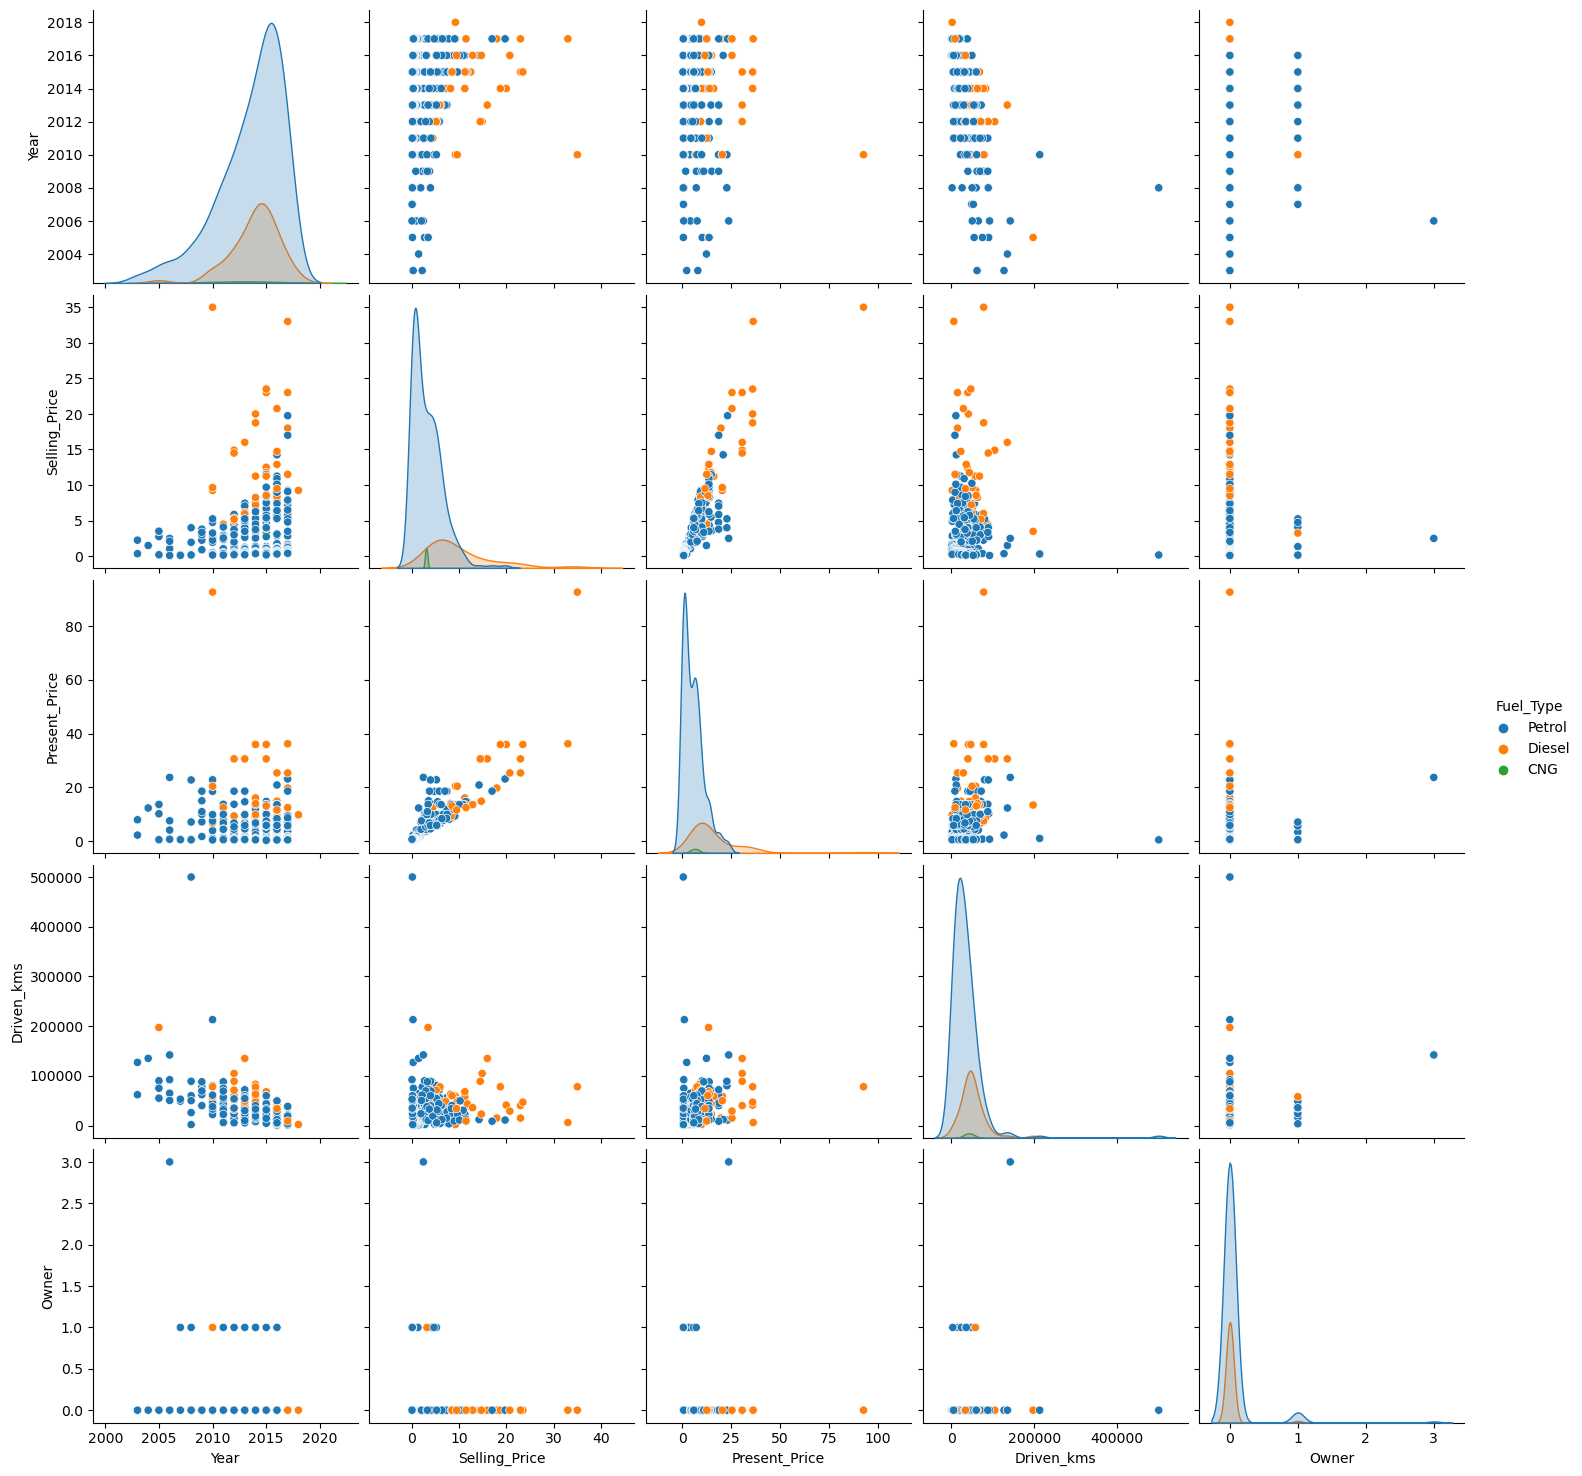

In [22]:
sns.pairplot(car_data_viz, hue='Fuel_Type',height = 3)
plt.show()

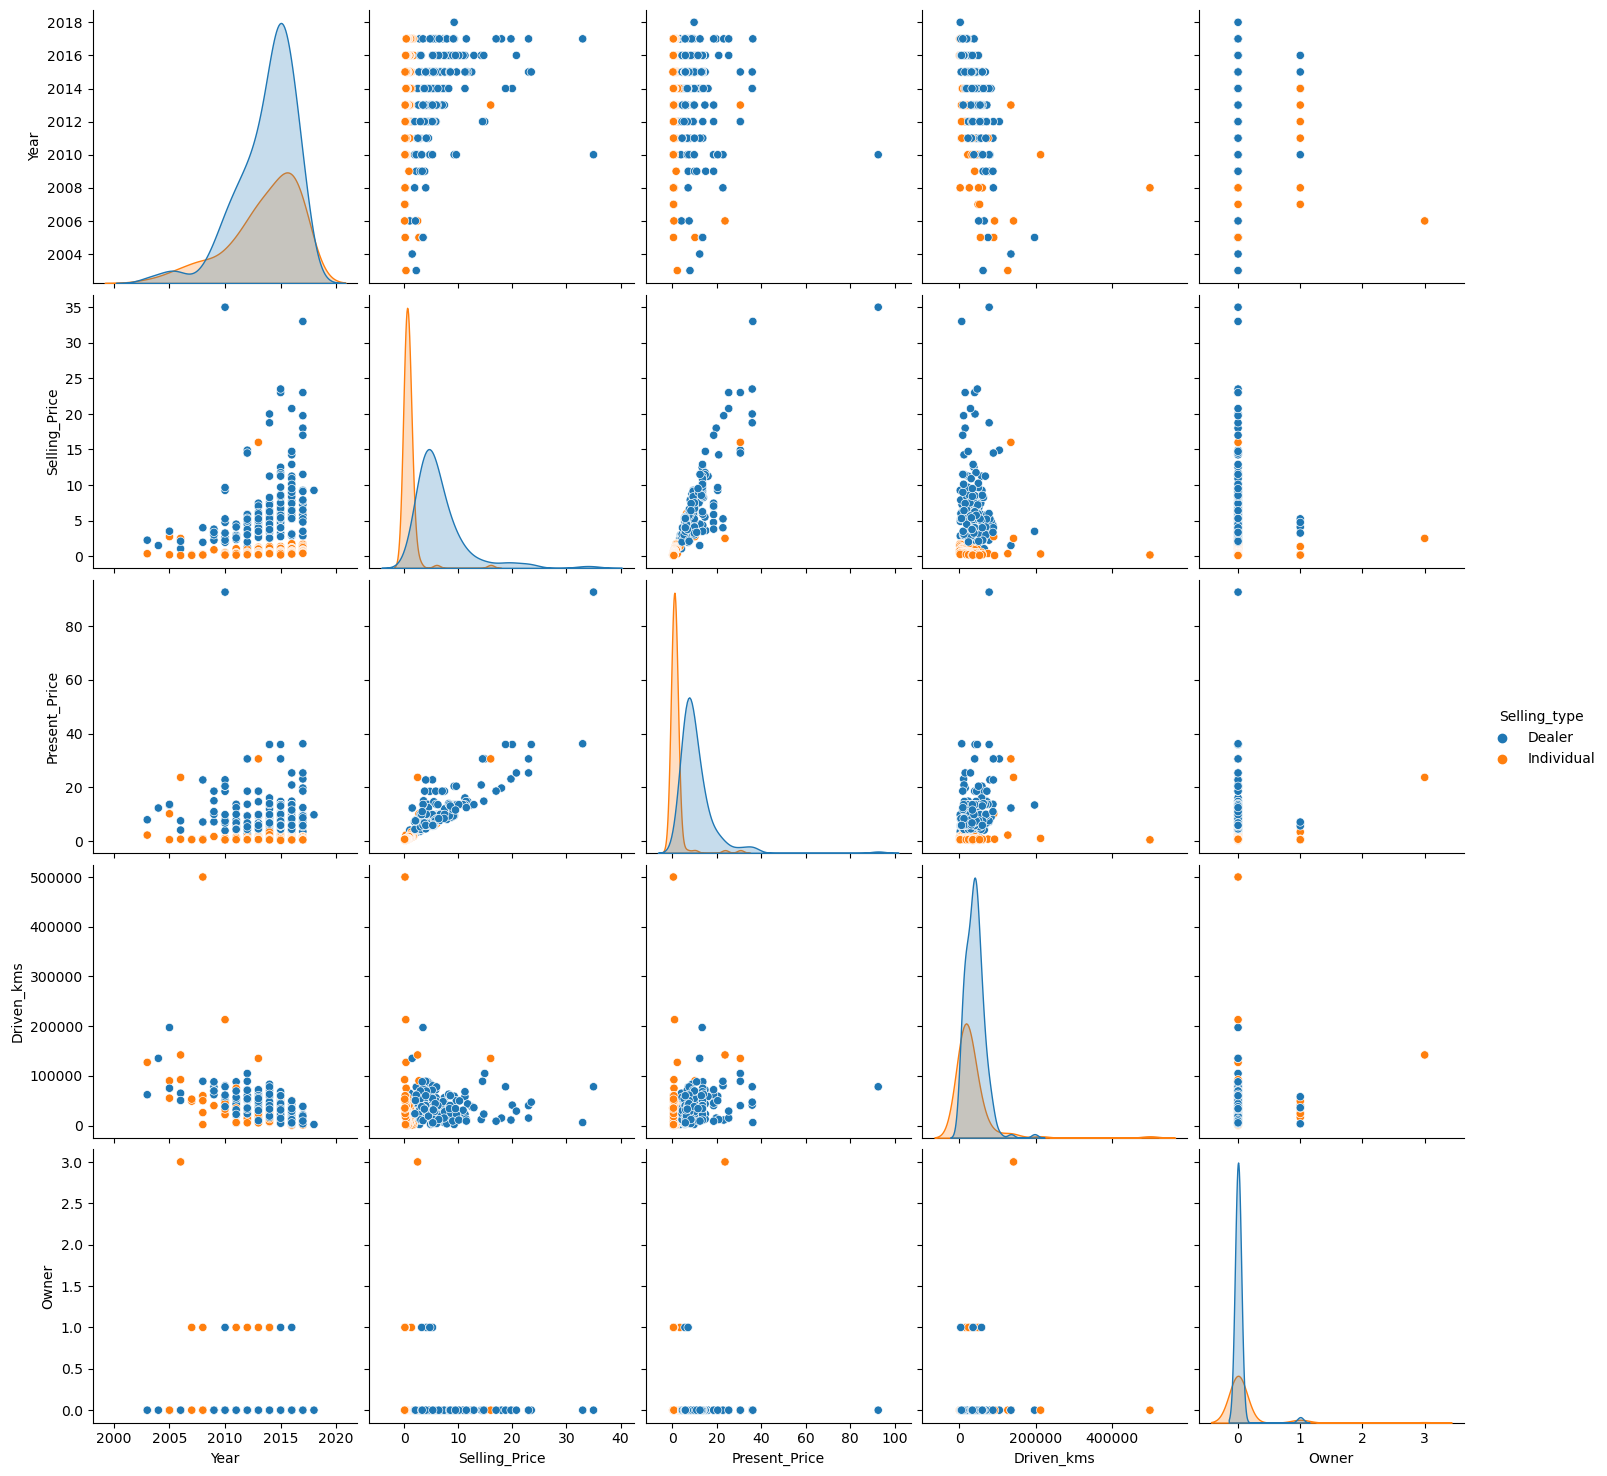

In [23]:
sns.pairplot(car_data_viz, hue='Selling_type',height = 3)
plt.show()

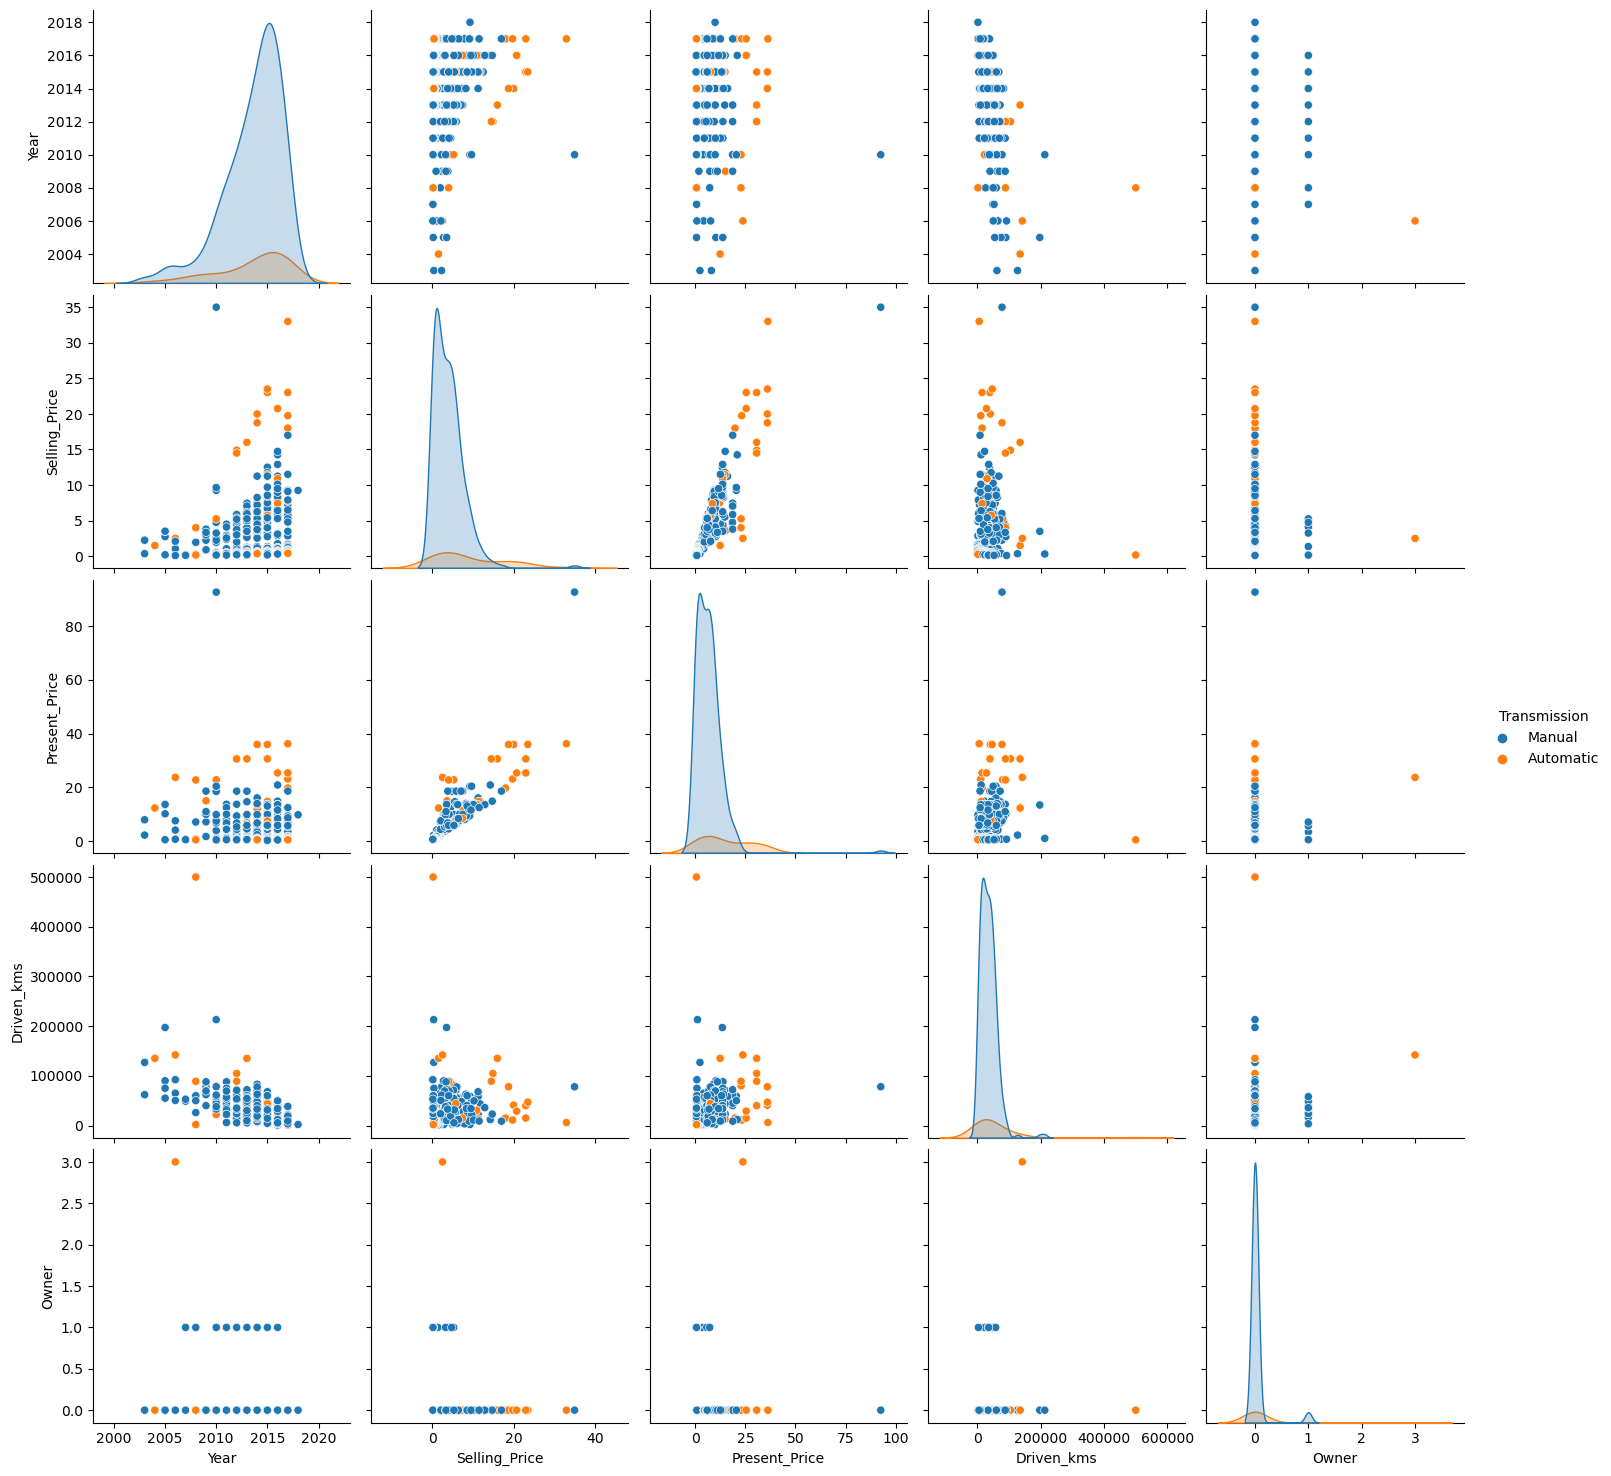

In [24]:
sns.pairplot(car_data_viz, hue='Transmission',height =3)
plt.show()

*2.1 bar plot*

In [25]:
car_data_sort = car_data_viz.sort_values('Selling_Price',ascending = False)
car_data_sort.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
86,Land,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0
64,Fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0
63,Fortuner,2015,23.5,35.96,47000,Diesel,Dealer,Automatic,0
82,Innova,2017,23.0,25.39,15000,Diesel,Dealer,Automatic,0
51,Fortuner,2015,23.0,30.61,40000,Diesel,Dealer,Automatic,0


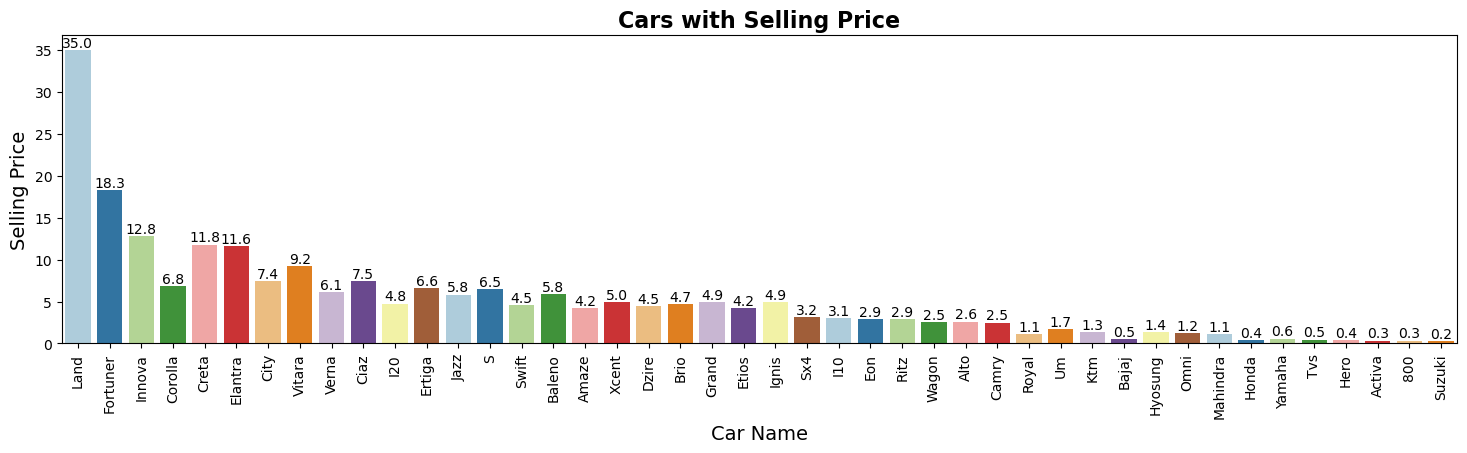

In [26]:
plt.figure(figsize=(18,4))
ax =sns.barplot(x=car_data_sort['Car_Name'], y=car_data_sort['Selling_Price'], palette='Paired',errorbar=('ci', False))
ax.bar_label(ax.containers[0],fmt='%0.01f')
plt.title('Cars with Selling Price',fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Car Name', fontsize=14)
plt.ylabel('Selling Price',fontsize=14)
plt.show()


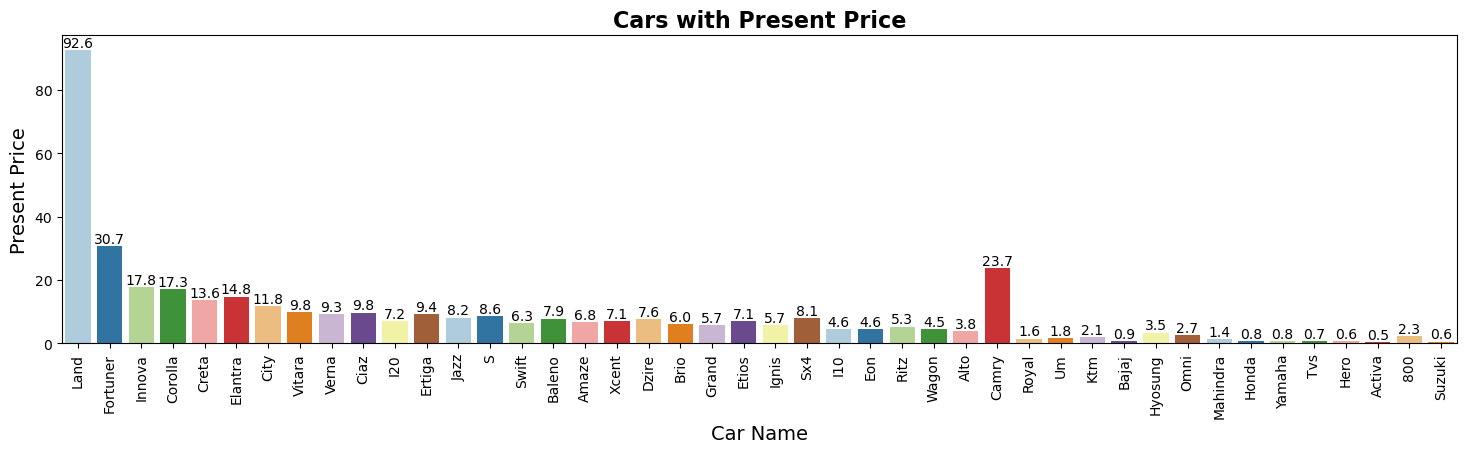

In [27]:
plt.figure(figsize=(18,4))
ax = sns.barplot(x=car_data_sort['Car_Name'], y=car_data_sort['Present_Price'], palette='Paired',errorbar=('ci', False))
ax.bar_label(ax.containers[0],fmt='%0.01f')
plt.title('Cars with Present Price',fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Car Name', fontsize=14)
plt.ylabel('Present Price',fontsize=14)
plt.show()


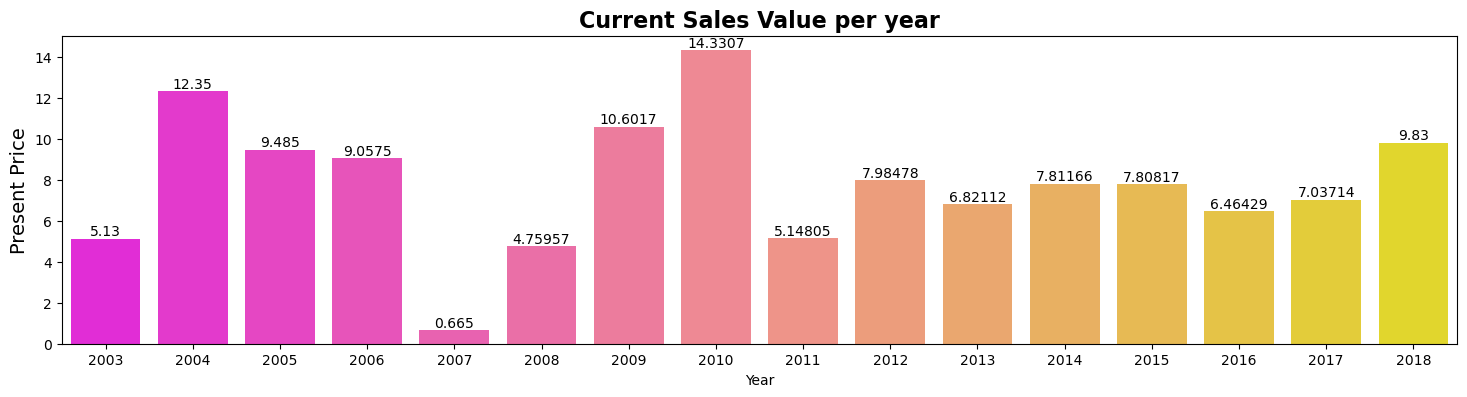

In [28]:
plt.figure(figsize=(18,4))
ax=sns.barplot(x=car_data_sort['Year'], y=car_data_sort['Present_Price'],palette ='spring',errorbar=('ci', False))
ax.bar_label(ax.containers[0])
plt.title('Current Sales Value per year',fontsize=16, fontweight='bold')
plt.ylabel('Present Price',fontsize=14)
plt.show()

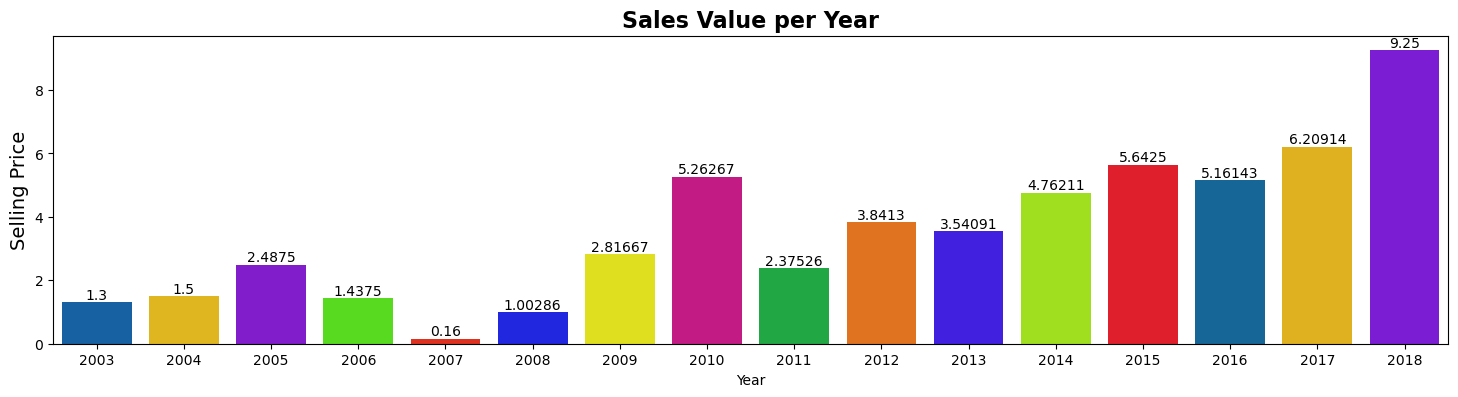

In [29]:
plt.figure(figsize=(18,4))
ax=sns.barplot(x=car_data_sort['Year'], y=car_data_sort['Selling_Price'],palette ='prism',errorbar=('ci', False))
ax.bar_label(ax.containers[0])
plt.title('Sales Value per Year',fontsize=16, fontweight='bold')
plt.ylabel('Selling Price',fontsize=14)
plt.show()

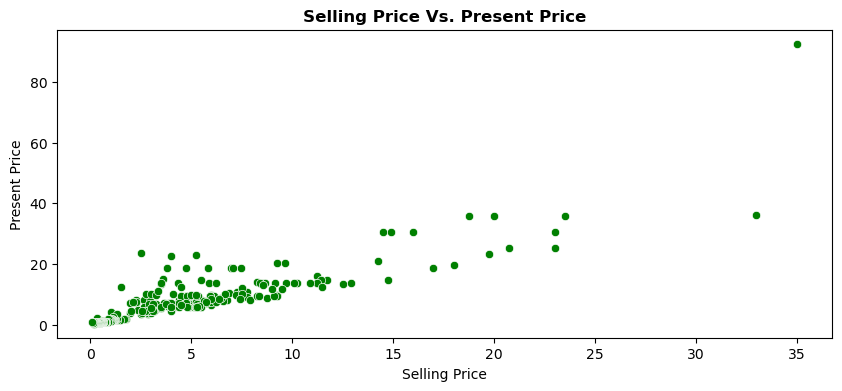

In [30]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=car_data_viz['Selling_Price'], y=car_data_viz['Present_Price'],color = 'green')
plt.title('Selling Price Vs. Present Price', fontsize=12, fontweight='bold')
plt.xlabel('Selling Price')
plt.ylabel('Present Price')
plt.show()

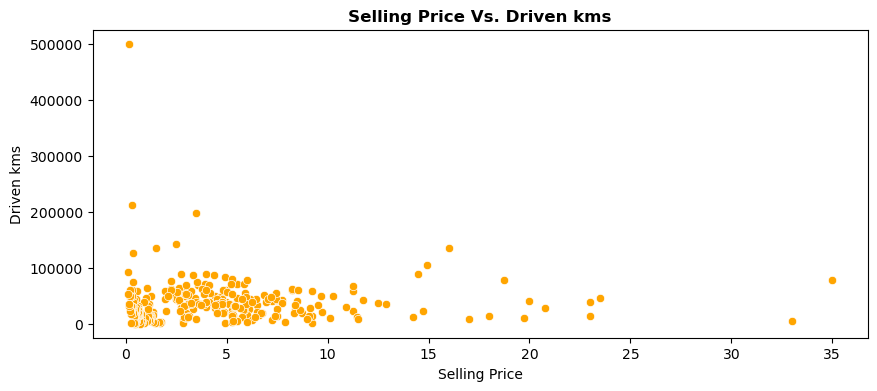

In [31]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=car_data_viz['Selling_Price'], y=car_data_viz['Driven_kms'],color = 'orange')
plt.title('Selling Price Vs. Driven kms', fontsize=12, fontweight='bold')
plt.xlabel('Selling Price')
plt.ylabel('Driven kms')
plt.show()

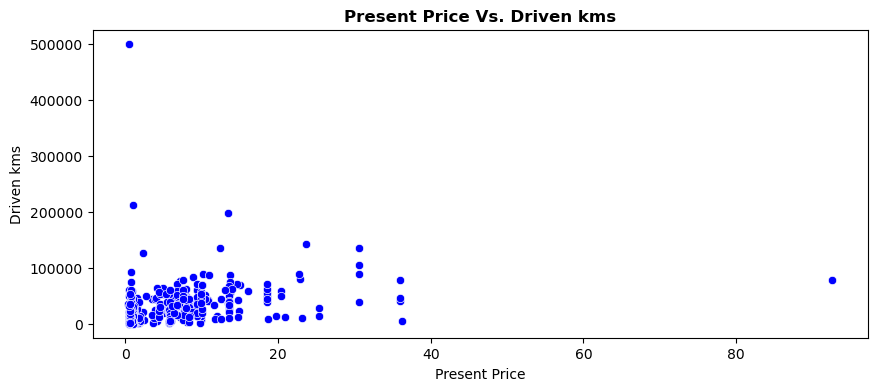

In [32]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=car_data_viz['Present_Price'], y=car_data_viz['Driven_kms'],color ='blue')
plt.title('Present Price Vs. Driven kms', fontsize=12, fontweight='bold')
plt.xlabel('Present Price')
plt.ylabel('Driven kms')
plt.show()

In [33]:
car_data_viz.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,Ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,Sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,Ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,Wagon,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,Swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


plt.figure(figsize = (18,4))
sns.countplot(car_data_viz,x= 'Car_Name',hue='Fuel_Type', palette = 'gist_ncar')
plt.title('Value Count of Cars by Fuel Types',fontsize=16,fontweight='bold')
plt.xticks(rotation = 80)
plt.xlabel('Cars',fontsize=14)
plt.show()

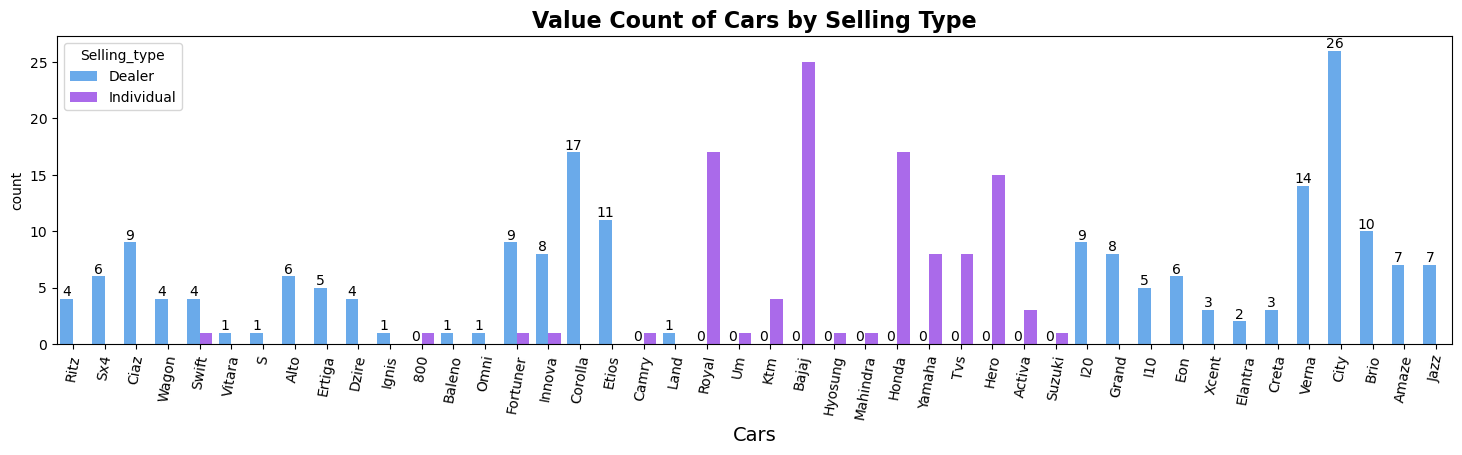

In [34]:
plt.figure(figsize = (18,4))
ax=sns.countplot(car_data_viz,x= 'Car_Name',hue='Selling_type', palette = 'cool')
ax.bar_label(ax.containers[0])
plt.title('Value Count of Cars by Selling Type', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 80)
plt.xlabel('Cars', fontsize = 14)
plt.show()

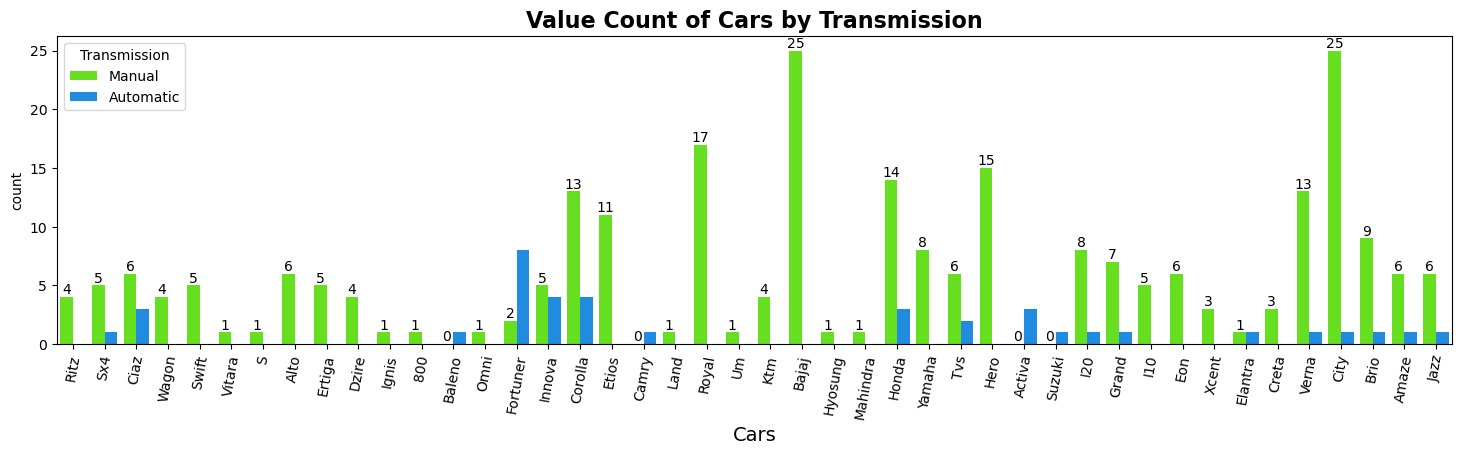

In [35]:
plt.figure(figsize = (18,4))
ax = sns.countplot(car_data_viz,x= 'Car_Name',hue='Transmission', palette = 'gist_rainbow')
ax.bar_label(ax.containers[0])
plt.title('Value Count of Cars by Transmission', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 80)
plt.xlabel('Cars', fontsize = 14)
plt.show()

**3. Regression Models.**

In [36]:
car_data

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,0
297,2015,4.00,5.90,60000,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0
299,2017,11.50,12.50,9000,1,0,0,0


In [37]:
X = car_data.drop('Selling_Price',axis =1)
X.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [38]:
y = car_data.Selling_Price
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [39]:
#Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state = 42,train_size =0.8)

**4.1 Linear Regression Model**

In [40]:
LinearModel = LinearRegression()

In [41]:
LinearModel.fit(X_train,y_train)

LinearRegression()

In [42]:
y_hat = LinearModel.predict(X_test)

In [43]:
print(f"Model Score on Training Data: {LinearModel.score(X_train,y_train)*100:0.2f}")
print(f"Model Score on Test Data: {LinearModel.score(X_test,y_test)*100:0.2f}")

Model Score on Training Data: 90.27
Model Score on Test Data: 74.10


In [44]:
mse = mean_squared_error(y_test,y_hat)
rmse = np.sqrt(mse)
print("Root_mean_squred_error Linear Regression {:.4f}".format(rmse))
print("R2_score Linear Regression {:4f}".format(r2_score(y_test,y_hat)))
print("Mean_absolute_error Linear Regression {:4f}".format(mean_absolute_error(y_test,y_hat)))

Root_mean_squred_error Linear Regression 2.5837
R2_score Linear Regression 0.740993
Mean_absolute_error Linear Regression 1.540812


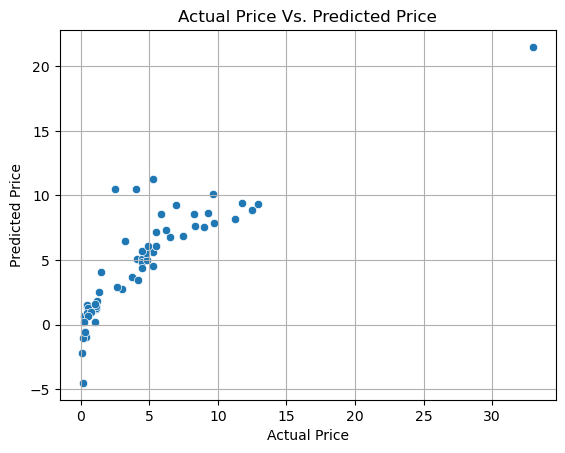

In [45]:
sns.scatterplot(x = y_test,y = y_hat)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs. Predicted Price')
plt.grid()
plt.show()

**4.2 Random Forest Regressor.**

In [46]:
forest_model =RandomForestRegressor()

In [47]:
forest_model.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
y_for = forest_model.predict(X_test)

In [49]:
print(f"Random Forest Regressor Model Score on Training Data: {forest_model.score(X_train,y_train)*100:0.2f}")
print(f"Random Forest Regressor Model Score on Test Data: {forest_model.score(X_test,y_test)*100:0.2f}")

Random Forest Regressor Model Score on Training Data: 97.72
Random Forest Regressor Model Score on Test Data: 52.56


In [50]:
mse = mean_squared_error(y_test,y_for)
rmse = np.sqrt(mse)
print("Root_mean_squred_error Linear Regression {:.4f}".format(rmse))
print("R2_score Linear Regression {:4f}".format(r2_score(y_test,y_hat)))
print("Mean_absolute_error Linear Regression {:4f}".format(mean_absolute_error(y_test,y_for)))

Root_mean_squred_error Linear Regression 3.4967
R2_score Linear Regression 0.740993
Mean_absolute_error Linear Regression 1.472713


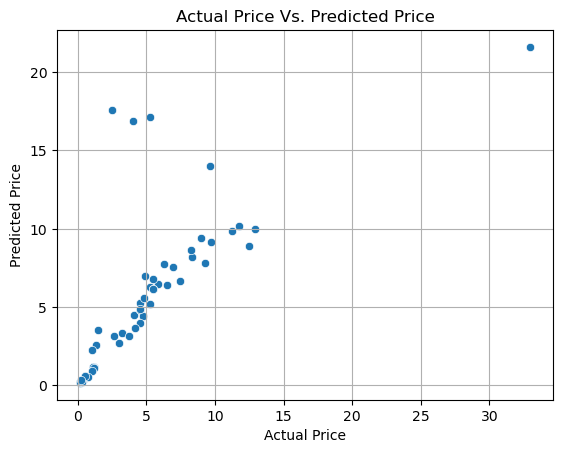

In [51]:
sns.scatterplot(x = y_test,y = y_for)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs. Predicted Price')
plt.grid()
plt.show()

**4.3 Decision Tree Regressor Model.**

In [52]:
tree = DecisionTreeRegressor(random_state =0)

In [53]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [54]:
tree_pred = tree.predict(X_test)

In [55]:
print(f"Random Forest Regressor Model Score on Training Data: {tree.score(X_train,y_train)*100:0.2f}")
print(f"Random Forest Regressor Model Score on Test Data: {tree.score(X_test,y_test)*100:0.2f}")

Random Forest Regressor Model Score on Training Data: 100.00
Random Forest Regressor Model Score on Test Data: 64.48


In [56]:
mse = mean_squared_error(y_test,tree_pred)
rmse = np.sqrt(mse)
print("Root_mean_squred_error Linear Regression {:.4f}".format(rmse))
print("R2_score Linear Regression {:4f}".format(r2_score(y_test,tree_pred)))
print("Mean_absolute_error Linear Regression {:4f}".format(mean_absolute_error(y_test,tree_pred)))

Root_mean_squred_error Linear Regression 3.0258
R2_score Linear Regression 0.644772
Mean_absolute_error Linear Regression 1.405333


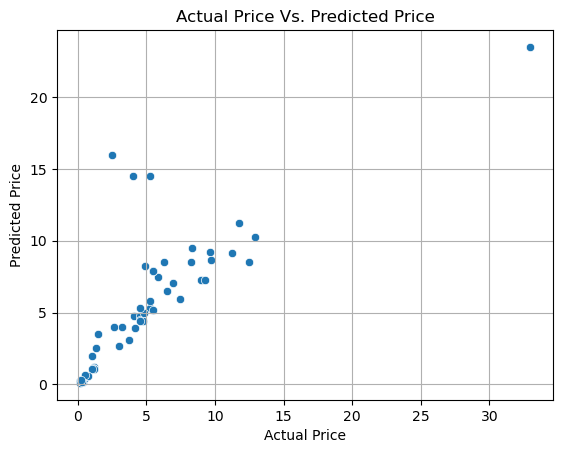

In [57]:
sns.scatterplot(x=y_test,y=tree_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs. Predicted Price')
plt.grid()
plt.show()

**4.4 Lasso Regression Model.**

In [58]:
las = Lasso()

In [59]:
las.fit(X_train,y_train)

Lasso()

In [60]:
y_las = las.predict(X_test)

In [61]:
print(f"Lasso Model Score on Training Data: {las.score(X_train,y_train)*100:0.2f}")
print(f"Lasso Model Score on Test Data: {las.score(X_test,y_test)*100:0.2f}")

Lasso Model Score on Training Data: 86.68
Lasso Model Score on Test Data: 70.23


In [62]:
mse = mean_squared_error(y_test,y_las)
rmse = np.sqrt(mse)
print("Root_mean_squred_error Linear Regression {:.4f}".format(rmse))
print("R2_score Linear Regression {:4f}".format(r2_score(y_test,y_las)))
print("Mean_absolute_error Linear Regression {:4f}".format(mean_absolute_error(y_test,y_las)))

Root_mean_squred_error Linear Regression 2.7698
R2_score Linear Regression 0.702332
Mean_absolute_error Linear Regression 1.704932


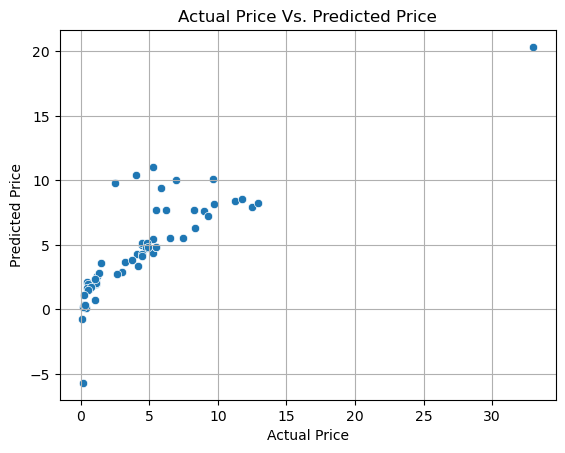

In [63]:
sns.scatterplot(x=y_test,y=y_las)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs. Predicted Price')
plt.grid()
plt.show()